In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#df_edx_courses = pd.read_csv(r'Moocs\edx_courses.csv', encoding='utf-8', index_col=False)
df_edx_courses = pd.read_csv(r'C:\Users\USER\Documents\Henry\Proyecto Individual Moocs\Moocs\edx_courses.csv', encoding='utf-8', index_col=False)



In [3]:
df_edx_courses.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [4]:
df_edx_courses.isna().sum().sum()

780

In [5]:
df_edx_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     414 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

Se decide eliminar las siguientes columnas del dataset ya que no existe una relación directa entre el objetivo del análisis y la informacion de la columna.

Objetivo: 
1. Nivel ventas
2. Precio
3. Idioma
4. Nivel
5. Rating

Las siguientes columnas no tienen relacion alguna con el objetivo:

course_syllabus
instructors (Para un análisis exploratorio de datos (EDA), no se utilizan nombrres)
summary
course_description
course_url
subtitles
course_type

In [6]:
del df_edx_courses['course_syllabus']
del df_edx_courses['instructors']
del df_edx_courses['summary']
del df_edx_courses['course_description']
del df_edx_courses['course_url']
del df_edx_courses['subtitles']
del df_edx_courses['course_type']
del df_edx_courses['course_effort']



In [7]:
df_edx_courses.isna().sum()

title              0
n_enrolled       120
institution        0
Level              0
subject            0
language           0
course_length      0
price              0
dtype: int64

Se realiza ajuste de columnas y se limpia información importante para el desarrollo del EDA

In [8]:
df_edx_courses.rename(columns={'price': 'certificate_price'}, inplace=True)
df_edx_courses.rename(columns={'course_length': 'hours_weeks'}, inplace=True)
#df_edx_courses.rename(columns={'course_effort': 'course_effort_h_week'}, inplace=True)

#df_edx_courses['course_effort_h_week'] = df_edx_courses['course_effort_h_week'].str.replace('hours per week', ' ')
df_edx_courses['hours_weeks'] = df_edx_courses['hours_weeks'].str.replace('Weeks', ' ')

df_edx_courses['certificate_price'] = df_edx_courses['certificate_price'].str.replace('FREE-Add a Verified Certificate for ', '')
df_edx_courses['certificate_price'] = df_edx_courses['certificate_price'].str.replace('USD', '')
df_edx_courses['certificate_price'] = df_edx_courses['certificate_price'].str.replace('$', '')

df_edx_courses['n_enrolled'] = pd.to_numeric(df_edx_courses['n_enrolled'].str.replace(',', ''))
# Rellenar los valores NaN con cero antes de la conversión
df_edx_courses['n_enrolled'].fillna(0, inplace=True)

# Convertir la columna 'n_enrolled' a tipo int64
df_edx_courses['n_enrolled'] = df_edx_courses['n_enrolled'].astype(int)

df_edx_courses['certificate_price'] = pd.to_numeric(df_edx_courses['certificate_price'], errors='coerce')


In [9]:
#Se verifica si hat valores nulos
df_edx_courses.isna().sum()

title                0
n_enrolled           0
institution          0
Level                0
subject              0
language             0
hours_weeks          0
certificate_price    0
dtype: int64

In [10]:
df_edx_courses.head()

,title,n_enrolled,institution,Level,subject,language,hours_weeks,certificate_price
0,How to Learn Online,124980,edX,Introductory,Education & Teacher Training,English,2,49.0
1,Programming for Everybody (Getting Started wit...,293864,The University of Michigan,Introductory,Computer Science,English,7,49.0
2,CS50's Introduction to Computer Science,2442271,Harvard University,Introductory,Computer Science,English,12,90.0
3,The Analytics Edge,129555,Massachusetts Institute of Technology,Intermediate,Data Analysis & Statistics,English,13,199.0
4,Marketing Analytics: Marketing Measurement Str...,81140,"University of California, Berkeley",Introductory,Computer Science,English,4,249.0


In [11]:
df_edx_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              975 non-null    object 
 1   n_enrolled         975 non-null    int32  
 2   institution        975 non-null    object 
 3   Level              975 non-null    object 
 4   subject            975 non-null    object 
 5   language           975 non-null    object 
 6   hours_weeks        975 non-null    object 
 7   certificate_price  975 non-null    float64
dtypes: float64(1), int32(1), object(6)
memory usage: 57.3+ KB


In [12]:
#Conversión a variables categoricas
#df_edx_courses.id=df_edx_courses.id.astype('category')
df_edx_courses.title=df_edx_courses.title.astype('category')
df_edx_courses.institution=df_edx_courses.institution.astype('category')
df_edx_courses.Level=df_edx_courses.Level.astype('category')
df_edx_courses.subject=df_edx_courses.subject.astype('category')
df_edx_courses.language=df_edx_courses.language.astype('category')
#df_edx_courses.course_effort_h_week=df_edx_courses.course_effort_h_week.astype('category')
df_edx_courses.hours_weeks=df_edx_courses.hours_weeks.astype('int64')
df_edx_courses.certificate_price=df_edx_courses.certificate_price.astype('int64')



In [13]:
df_edx_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   title              975 non-null    category
 1   n_enrolled         975 non-null    int32   
 2   institution        975 non-null    category
 3   Level              975 non-null    category
 4   subject            975 non-null    category
 5   language           975 non-null    category
 6   hours_weeks        975 non-null    int64   
 7   certificate_price  975 non-null    int64   
dtypes: category(5), int32(1), int64(2)
memory usage: 71.5 KB


In [14]:
df_edx_courses.head()

,title,n_enrolled,institution,Level,subject,language,hours_weeks,certificate_price
0,How to Learn Online,124980,edX,Introductory,Education & Teacher Training,English,2,49
1,Programming for Everybody (Getting Started wit...,293864,The University of Michigan,Introductory,Computer Science,English,7,49
2,CS50's Introduction to Computer Science,2442271,Harvard University,Introductory,Computer Science,English,12,90
3,The Analytics Edge,129555,Massachusetts Institute of Technology,Intermediate,Data Analysis & Statistics,English,13,199
4,Marketing Analytics: Marketing Measurement Str...,81140,"University of California, Berkeley",Introductory,Computer Science,English,4,249


In [15]:
df_edx_courses.describe()

,n_enrolled,hours_weeks,certificate_price
count,9.750000e+02,975.000000,975.000000
mean,4.670523e+04,6.705641,100.458462
std,1.128239e+05,3.150327,69.569076
min,0.000000e+00,1.000000,5.000000
25%,8.529500e+03,4.000000,49.000000
50%,1.968700e+04,6.000000,79.000000
75%,4.891850e+04,8.000000,149.000000
max,2.442271e+06,18.000000,450.000000


En el primer gráfico se observa la tendencia de los cursos que ofrece edx con el dataset suministrado, la mayor concentración de cursos ofrecidos se encuentra en el nivel introductorio y nos permite inferir que tipos de curso podrían llegar a tener mayor aceptación.

<Axes: xlabel='Level', ylabel='count'>

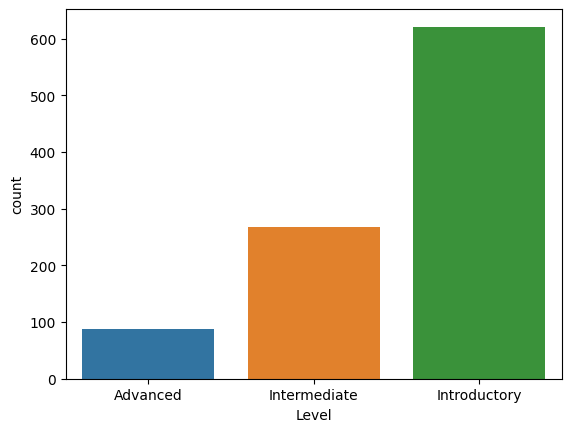

In [16]:
import seaborn as sns
# Se observa la distribucion de la variable categorica level para observar la tendencia 
sns.countplot(x=df_edx_courses.Level, data=df_edx_courses.n_enrolled)
      

En el segundo gráfico corresponde a las 5 temas con mayor número de ofertas, debido a las limitaciones del dataframe suministrado  no es posible hacer la relacion entre inscritos y personas que pagaron el certificado. Sin embargo es posible cuantificar los cursos/temas con mayor número de inscritos, aportando información significativo en el momento de elegir cursos a ofertar por la startup. Esta tendencia nos sugiere las tematicas con mas aceptación

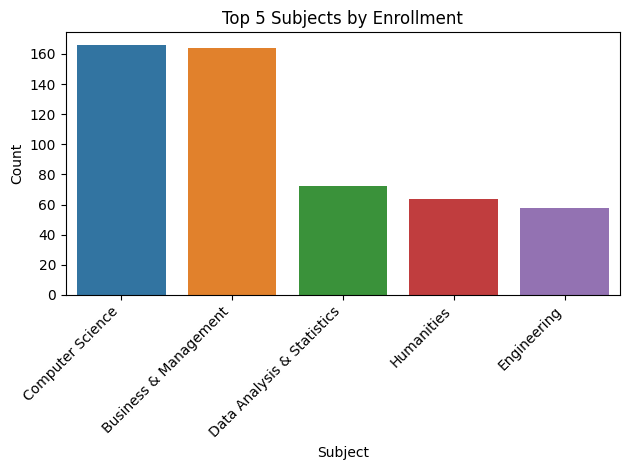

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener los recuentos de cada categoría en 'subject'
top_subjects = df_edx_courses['subject'].value_counts().head(5)

# Filtrar el DataFrame original para incluir solo las 5 categorías principales
df_top_subjects = df_edx_courses[df_edx_courses['subject'].isin(top_subjects.index)]

# Graficar la distribución de las categorías principales
ax = sns.countplot(x='subject', data=df_top_subjects, order=top_subjects.index)
ax.set_xlabel('Subject')
ax.set_ylabel('Count')
ax.set_title('Top 5 Subjects by Enrollment')

# Rotar las etiquetas del eje x para mostrarlas dentro de la columna
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


Edx se enfoca en desarrollar cursos moocs para diferentes instituciones, como se logra observar en la grafica 3, con estas variables podremos realizar propuestas con el objetivo de identicar el canal que se desea utilizar para llegar al usuario final.

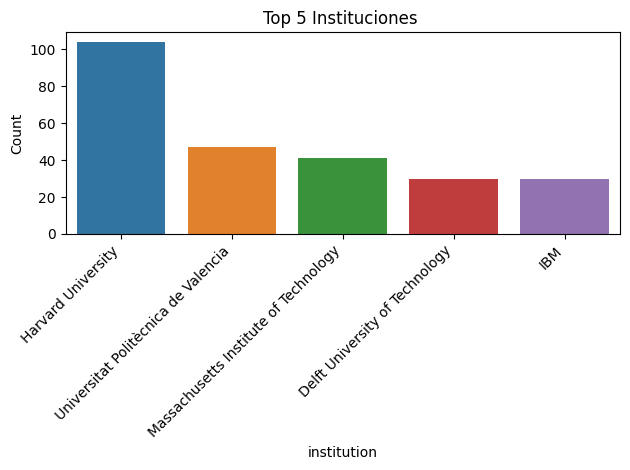

In [18]:
# Obtener los recuentos de cada categoría en 'subject'
top_subjects = df_edx_courses['institution'].value_counts().head(5)

# Filtrar el DataFrame original para incluir solo las 5 categorías principales
df_top_subjects = df_edx_courses[df_edx_courses['institution'].isin(top_subjects.index)]

# Graficar la distribución de las categorías principales
ax = sns.countplot(x='institution', data=df_top_subjects, order=top_subjects.index)
ax.set_xlabel('institution')
ax.set_ylabel('Count')
ax.set_title('Top 5 Instituciones ')

# Rotar las etiquetas del eje x para mostrarlas dentro de la columna
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

El idioma de los cursos ofertas es una variable de segmentación importante a la hora de definir las carcateristicas del curso a ofrecer por parte de la startup, se observa que más del 80% de los cursos ofertasdos se dictan en idioma inglés seguido por 18.2% que se dictan en español.

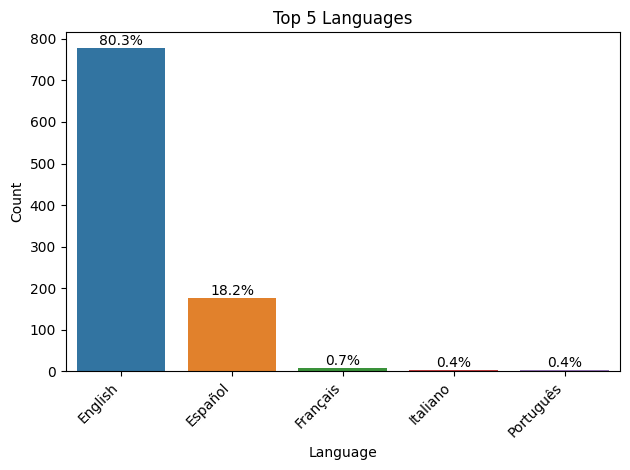

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener los recuentos de cada categoría en 'language'
top_languages = df_edx_courses['language'].value_counts().head(5)

# Filtrar el DataFrame original para incluir solo las 5 categorías principales
df_top_languages = df_edx_courses[df_edx_courses['language'].isin(top_languages.index)]

# Graficar la distribución de las categorías principales
ax = sns.countplot(x='language', data=df_top_languages, order=top_languages.index)
ax.set_xlabel('Language')
ax.set_ylabel('Count')
ax.set_title('Top 5 Languages')

# Agregar etiquetas de porcentaje en cada barra
total = len(df_top_languages)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Rotar las etiquetas del eje x para mostrarlas dentro de la columna
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


La grafica del escatter plot, permite identificar la relación entre el precio del certificado y la cantidad de inscritos, sin embargo debido a las limitaciones del dataset, no es posible cuantificar de la cantidad de inscritos cuantos pagaron por el certificado.
Se observa una relacion directa entre precio del certificado y cantidad de inscritos en precios especificos como 50, 100 y 200, demostrando el interes de los estudiantes por los cursos ofertados.

<Axes: xlabel='n_enrolled', ylabel='certificate_price'>

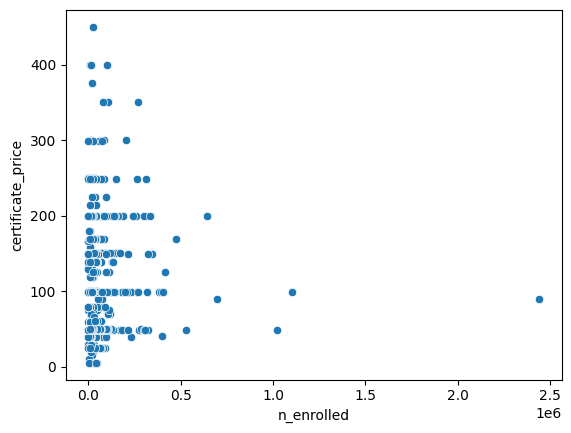

In [20]:
sns.scatterplot(data=df_edx_courses, x='n_enrolled', y='certificate_price')

In [21]:
df_edx_courses.columns

Index(['title', 'n_enrolled', 'institution', 'Level', 'subject', 'language',
       'hours_weeks', 'certificate_price'],
      dtype='object')

El histograma de estudiantes inscritos nos muestra la distribución

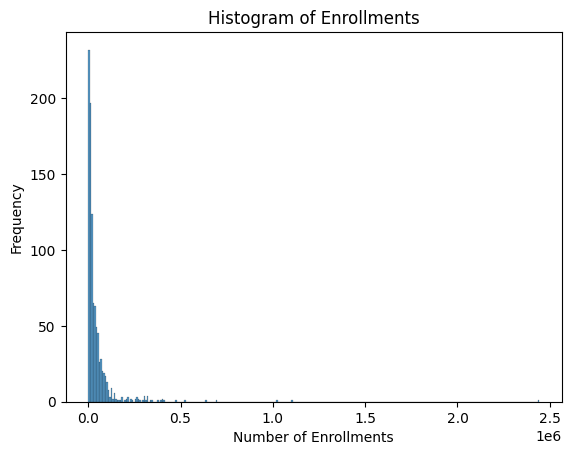

In [22]:
# Graficar el histograma de 'n_enrolled'
sns.histplot(data=df_edx_courses, x='n_enrolled')

# Configurar etiquetas y título del gráfico
plt.xlabel('Number of Enrollments')
plt.ylabel('Frequency')
plt.title('Histogram of Enrollments')
plt.show()


Distribución de horas por semana, se observa que la mayor frecuencia se encuentra en cursos con una duración semanal de 2.5 horas a 5.0 horas.

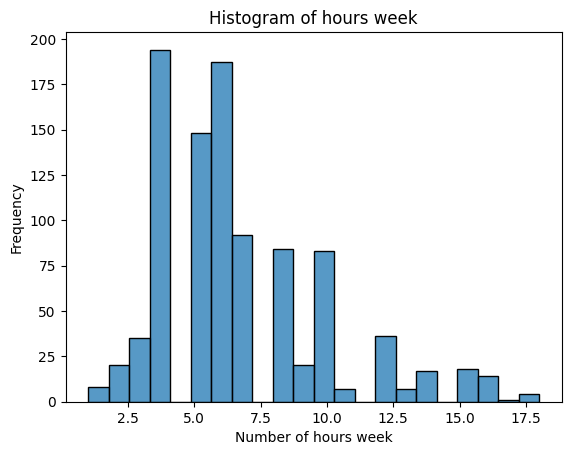

In [23]:
# Graficar el histograma de 'n_enrolled'
sns.histplot(data=df_edx_courses, x='hours_weeks')

# Configurar etiquetas y título del gráfico
plt.xlabel('Number of hours week')
plt.ylabel('Frequency')
plt.title('Histogram of hours week')
plt.show()

Distribución de precios por certicado, se observa que la mayor frecuencia se encuentra en cursos con un precio de 50.

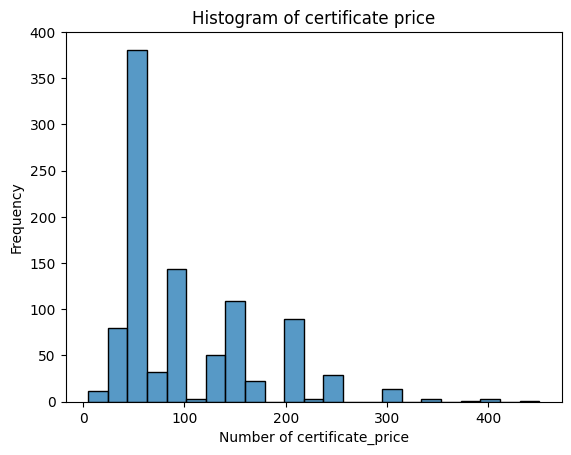

In [24]:
# Graficar el histograma de 'n_enrolled'
sns.histplot(data=df_edx_courses, x='certificate_price')

# Configurar etiquetas y título del gráfico
plt.xlabel('Number of certificate_price')
plt.ylabel('Frequency')
plt.title('Histogram of certificate price')
plt.show()

In [25]:
df_edx_courses1 = df_edx_courses[['n_enrolled', 'hours_weeks', 'certificate_price']]



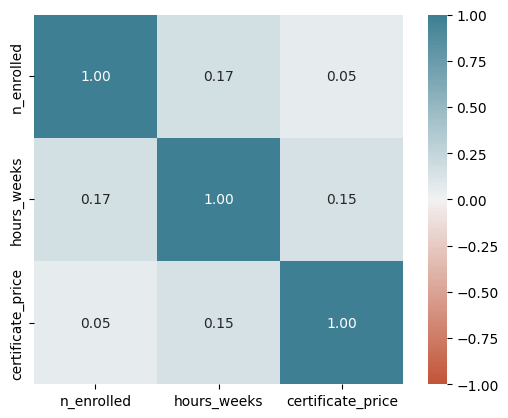

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_edx_courses1.corr()
ax = sns.heatmap(
    corr_matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    fmt= ".2f"
)
plt.show()


De acuerdo al wordcloud se logra identficar las palabras mas usadas en los nombres de los cursos ofrecidos

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


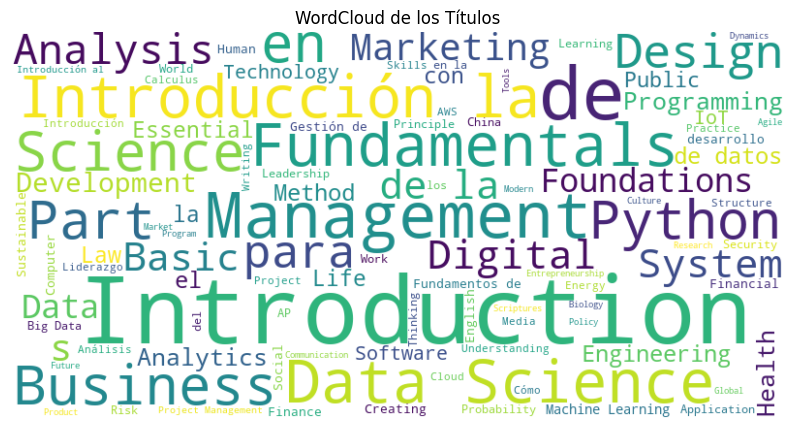

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Descargar las stopwords si no están disponibles
nltk.download('stopwords')

# Obtener los títulos del DataFrame
titulos = df_edx_courses['title']

# Unir todos los títulos en un solo texto
texto = ' '.join(titulos)

# Tokenizar el texto en palabras
tokens = word_tokenize(texto)

# Obtener las stopwords en el idioma deseado (en este caso, inglés)
stop_words = set(stopwords.words('english'))

# Filtrar las stopwords del texto
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Unir los tokens filtrados en un solo texto
filtered_text = ' '.join(filtered_tokens)

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(filtered_text)

# Mostrar el WordCloud en una figura
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud de los Títulos')
plt.show()